#### Project Introduction

This is a Udacity wrangling student project for Data Analyst undergoing the Nanodegree Betrelsmann scholarship program.

The focus of this project is on tweets data analysis from WeRateDogs: WeRateDogs are known for giving ratings to dogs with a unique rating model where the numerator is greater than the denominator, because the dogs are too good to them.

In total we will be working with 3 data-sets from 3 different sources, the first was handed to us by Udacity, the second was programmatically downloaded using a url web link and the third downloaded from twitter using twitters API access, and stored as a json text file, after which data is extrated from the file into a dataframe.

After gathering these sets of data, the data would be assessed, cleaned, stored, analysed, and visualised then reported on eventually. 


#### Project Objectives:

Gather data from three different sources.

Assess gathered data, and identify a minimum of 8 quality issues and 2 tidiness issues.

Clean the gathered data.

Save data as a CSV file titled twitter-archive-master.csv.

Analyse and visualize stored data, uncovering three insights and a visualization.

Report the work by producing two documents named (wrangle_report.pdf or html not less than 300-600 words) detailing wrangling process, the other named (act_report.pdf or html, 250 words minimum) detailing insights and visualizations.

### Data Gathering

As we proceed gathering data, libraries needed would be downloaded, which include pandas, numpy, tweepy, request and json. As we begin we might import some more libraries as we deem necessary.

In [136]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json

#### First data set

The data given by Udacity titled 'twitter-archive-enhance.csv' would be read using the pandas function

In [137]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [138]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [139]:
archive_df.shape

(2356, 17)

#### Second data set

We are going to download this data programmatically from a url web link provided by udacity, the cell that ran the code has been commented out to avoid throwing off an error for running it a second time.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [140]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [141]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [142]:
image_df.shape

(2075, 12)

#### Third data set

For some reason, my application for a twitter API access is yet to be granted, an alternative to downloading the tweets data using the expected API from twitter, is to make do with the json file (containing the tweets data for WeRateDogs) handed to us by Udacity. We shall begin data extraction right away.


url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [144]:
tweet_list = []
with open('tweet-json.txt') as file:
    for line in file:
        try:
            tweets = json.loads(line)
            tweet_list.append(tweets)
        except:
            continue
            
            
    file.close()
    

In [145]:
# Extracting data from file
tweet_data = []
for tweet in tweet_list:
    tweet_data.append({'tweet_id': tweet['id'],
                       'favorite_count': tweet['favorite_count'],
                      'retweet': tweet['retweet_count'],
                      'full_text': tweet['full_text'],
                      'timestamp': tweet['created_at'],
                      'user_id': tweet['user']['id']})

In [146]:
# Making the extracted data into a data frame
tweet_df = pd.DataFrame(tweet_data, columns = ['tweet_id',
                                               'favorite_count',
                                               'retweet',
                                               'timestamp',
                                               'user_id',
                                               'full_text'])

In [147]:
tweet_df.head()

,tweet_id,favorite_count,retweet,timestamp,user_id,full_text
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,4196983835,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,4196983835,This is Tilly. She's just checking pup on you....
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,4196983835,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,4196983835,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,4196983835,This is Franklin. He would like you to stop ca...


In [148]:
tweet_df.shape

(2354, 6)

#### Assessing gathered data

All 3 data frames have been sucessfully created and saved with name archive_df, image_df and tweet_df, assesment of these data sets is what we are delving into next, but before then we would make a copy of all three data frames.

In [164]:
#making a copy of all three dataframes

archive_clean_df = archive_df.copy() 
image_clean_df = image_df.copy()
tweet_clean_df = tweet_df.copy()

In [208]:
#observing the archive dataframe for quality and tidiness issues
archive_clean_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [151]:
archive_clean_df.shape

(2356, 17)

In [152]:
archive_clean_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [154]:
#checking for extraneous values.

archive_clean_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [162]:
#checking for null values, data types and irrelevant columns
#
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are irrelevant and would not be needed for the purpose of this analysis

timestamp has datatype object, which should be date instead, and trimmed to contain standard date format.

In [165]:
archive_clean_df['tweet_id'].nunique()

2356

In [167]:
#assessing denominator values, revealing values other than 10, which should not be.
archive_clean_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [168]:
archive_clean_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

columns 'doggo', 'floofer', 'pupper' and 'puppo' should be collapsed into a single column titled 'dog stage' which each value duly represented.



#### Assessing Image data frame

In [406]:
image_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [407]:
image_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [408]:
image_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

columns 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' are not descriptive enough

In [409]:
image_clean_df['p1_dog'].unique()

array([ True, False])

In [410]:
image_clean_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [411]:
#examining the False value for p1_dog

image_clean_df[image_clean_df['p1_dog']== False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [412]:
image_clean_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [413]:
#examining the False value for p2_dog

image_clean_df[image_clean_df['p2_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,886258384151887873,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,pug,0.943575,True,shower_cap,0.025286,False,Siamese_cat,0.002849,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2050,887343217045368832,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [414]:
image_clean_df['p3_dog'].unique()

array([ True, False])

In [415]:
image_clean_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [416]:
#examining the False value for p3_dog

image_clean_df[image_clean_df['p3_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


p1_dog, p2_dog and p3_dog columns posses values not related to dogs, which should be dropped as we are concerned with only dog ratings, meaning we want only true values for those columns, and eventually when allcolumns are true, we will drop them as well.

In [417]:
image_clean_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
picket_fence            1
traffic_light           1
bannister               1
minibus                 1
barbell                 1
Name: p1, Length: 378, dtype: int64

In [418]:
image_clean_df['p1'].nunique()

378

In [419]:
image_clean_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
leafhopper              1
Kerry_blue_terrier      1
bobsled                 1
bannister               1
red_fox                 1
Name: p2, Length: 405, dtype: int64

In [420]:
image_clean_df['p2'].nunique()

405

In [421]:
image_clean_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
cup                    1
golfcart               1
hand-held_computer     1
bonnet                 1
broccoli               1
Name: p3, Length: 408, dtype: int64

p1, p2 and p3 have value other than dogs, I will assume as the p1_dog, p2_dog and p3_dog False values are dropped, it would take care of the non dog values in p1,p2 and p3 columns.

#### Assessing tweet dataframe

In [422]:
tweet_clean_df.head()

,tweet_id,favorite_count,retweet,timestamp,user_id,full_text
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,4196983835,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,4196983835,This is Tilly. She's just checking pup on you....
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,4196983835,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,4196983835,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,4196983835,This is Franklin. He would like you to stop ca...


In [423]:
#assessing user_id to view unique values

tweet_clean_df['user_id'].nunique()

1

user_id column would be dropped as it has same value for the entire column.
timestamp column would be split in day month and year


### Identified Quality and Tidiness issues

#### Quality Issues

#### Archive data frame
1 in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns are irrelevant and would be dropped, after eliminating their non null values

2 'none' values for columns 'doggo', 'floofer', 'pupper' and 'puppo' would be replaced with '-'

3 rating_numerator contains extraneous values which would be dropped

4 rating_denominator contains values other that 10, which should not be as rating should possess same denominator

5 timestamp column is a string, which should be converted to date time and column values trimmed to contain proper date values.


#### Image data frame
6 columns 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' are not discriptive enough and should be renamed

7 'p1_dog', 'p2_dog' and 'p3 dog', with false values should be dropped as they are not dogs

8 After dropping the false values for 'p1_dog', 'p2_dog' and 'p3 dog', columns should be dropped as all value become true

9 p1, p2 and p3 have value other than dogs, which should not be, as the p1_dog, p2_dog and p3_dog False values are dropped, it would take care of the non dog values in p1,p2 and p3 columns.

10 Capitalize the names in columns in 'p1', 'p2', and 'p3'

#### Tweet data frame

11 User_id column should be dropped as it has same value for the entire column.

#### Tidiness Issues
1 columns 'doggo', 'floofer', 'pupper' and 'puppo' should be collapsed into a column titled 'dog stage'

2 image_clean_df and tweet_clean_df would be merged with archive_clean_df on tweet_id to form one master data frame

3 'timestamp' column would be split in 3, 'day', 'month' and 'year' columns.

4 create a rating column





### Cleaning The Data Frame

A copy of all data frames have been made, which are archive_clean_df, image_clean_df and tweet_clean_df, which would be cleaned to address the quality and tidiness issues pointed out above.

We shall proceed adressing the issues in this manner:

1.Address missing data (completeness).

2.Tidiness issues next.

3.Quality issues afterwards.

### Quality-Cleaning 1

#### Define

Eliminate the non null rows for columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' and drop columns afterwards.

#### Code

In [633]:
# retrieving the non null data using the tilda function
reply_status = (~archive_clean_df['in_reply_to_status_id'].isnull())
reply_user = (~archive_clean_df['in_reply_to_user_id'].isnull())
retweeted_status = (~archive_clean_df['retweeted_status_id'].isnull())
retweeted_user = (~archive_clean_df['retweeted_status_user_id'].isnull())
retweeted_timestamp = (~archive_clean_df['retweeted_status_timestamp'].isnull())

In [634]:
# checking the sum of non null values
reply_status.sum(), reply_user.sum(), retweeted_status.sum(), retweeted_user.sum(), retweeted_timestamp.sum()


(78, 78, 181, 181, 181)

In [635]:
archive_clean_df = archive_clean_df[~reply_status]

In [636]:
archive_clean_df = archive_clean_df[~retweeted_status]

C:\Users\OB_411\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### Test

In [637]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [638]:
# dropping columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

archive_clean_df.drop(columns = ['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id',
                                'retweeted_status_timestamp'], inplace = True)

#### Test

In [639]:
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Quality-Cleaning 2: Replacing none value for archive_df
#### Define

'none' values for columns 'doggo', 'floofer', 'pupper' and 'puppo' should be replaced with '-'

#### Code

In [640]:
archive_clean_df['doggo'].replace(['None'], '-', inplace = True)
archive_clean_df['floofer'].replace(['None'], '-', inplace = True)
archive_clean_df['pupper'].replace(['None'], '-', inplace = True)
archive_clean_df['puppo'].replace(['None'], '-', inplace = True)

#### Test

In [641]:
archive_clean_df['doggo'].unique()

array(['-', 'doggo'], dtype=object)

In [642]:
archive_clean_df['floofer'].unique()

array(['-', 'floofer'], dtype=object)

In [643]:
archive_clean_df['pupper'].unique()

array(['-', 'pupper'], dtype=object)

In [644]:
archive_clean_df['puppo'].unique()

array(['-', 'puppo'], dtype=object)

### Quality Cleaning 3: Removing extraneous values from rating denominator

#### Define

drop rating_denominator with values other than 10




#### Code

In [645]:
denominator_10 = archive_clean_df['rating_denominator'] == 10

In [646]:
archive_clean_df = archive_clean_df[denominator_10]

#### Test

In [647]:
archive_clean_df['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Quality-Cleaning 4: Drop extraneuos values for rating_numerator

drop rating_numerator with values greater than 23, they are considered outliers

drop rating_numerator values less than 10, as WeRateDogs uses a unique rating system that rates dogs above the denominator.

#### Code

In [648]:
archive_clean_df['rating_numerator'].value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
75        1
420       1
26        1
27        1
1776      1
0         1
Name: rating_numerator, dtype: int64

In [649]:
numerator = (archive_clean_df['rating_numerator'] > 23) | (archive_clean_df['rating_numerator'] < 10)

In [650]:
archive_clean_df = archive_clean_df[~numerator]

#### Test

In [651]:
archive_clean_df['rating_numerator'].value_counts().sort_values()

14     38
13    287
11    413
10    436
12    486
Name: rating_numerator, dtype: int64

In [652]:
archive_clean_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,-,-,-,-
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,-,-,-,-


### Cleaning 4: Timestamp Column of Archive data frame

#### Define

Use slicing to trim column values in to proper date format

Change data type from string to date time

#### Code

In [653]:
archive_clean_df['timestamp'] = archive_clean_df['timestamp'].str[:11]

In [654]:
archive_clean_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,-,-,-,-


In [655]:
archive_clean_df['timestamp'] = pd.to_datetime(archive_clean_df['timestamp'], infer_datetime_format = True )

In [656]:
archive_clean_df.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Tidiness-Cleaning 5: Collapse columns into single unit

#### Define

Use pandas aggregrate function to collapse columns 'doggo', 'floofer', 'pupper' and 'puppo' into single column titled 'dog stage'

Drop 'dog_stage' with multiple growth stage values (doggopupper, doggopuppo, doggofloofer)

Rename columns appropraitely with Initial capital letter.


#### Code

In [657]:
archive_clean_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [658]:
archive_clean_df.shape[0]

1660

In [659]:
archive_clean_df['dog_stage'] = archive_clean_df[['doggo', 'floofer', 'pupper', 'puppo']].agg(''.join, axis=1)

In [660]:
archive_clean_df.shape[0]

1660

In [661]:
archive_clean_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,-,-,-,-,----


In [662]:
archive_clean_df['dog_stage'].value_counts()

----              1369
--pupper-          181
doggo---            69
---puppo            22
-floofer--           9
doggo-pupper-        8
doggo--puppo         1
doggofloofer--       1
Name: dog_stage, dtype: int64

In [663]:
# Dropping dog_stage with double value
doggo = ((archive_clean_df['dog_stage'] == 'doggo-pupper-') | (archive_clean_df['dog_stage'] == 'doggo--puppo') | (archive_clean_df['dog_stage'] == 'doggofloofer--'))
archive_clean_df = archive_clean_df[~doggo]
archive_clean_df['dog_stage'].value_counts()

----          1369
--pupper-      181
doggo---        69
---puppo        22
-floofer--       9
Name: dog_stage, dtype: int64

In [664]:
#updating dog_stage names to get rid of the dashes

archive_clean_df.loc[(archive_clean_df['dog_stage'] == '----'), 'dog_stage'] = 'Unnamed'
archive_clean_df.loc[(archive_clean_df['dog_stage'] == '--pupper-'), 'dog_stage'] = 'Pupper'
archive_clean_df.loc[(archive_clean_df['dog_stage'] == '---puppo'), 'dog_stage'] = 'Puppo'
archive_clean_df.loc[(archive_clean_df['dog_stage'] == '-floofer--'), 'dog_stage'] = 'Floofer'


In [665]:
archive_clean_df.loc[(archive_clean_df['dog_stage'] == 'doggo---'), 'dog_stage'] = 'Doggo'

#### Test

In [666]:
archive_clean_df['dog_stage'].value_counts()

Unnamed    1369
Pupper      181
Doggo        69
Puppo        22
Floofer       9
Name: dog_stage, dtype: int64

In [667]:
archive_clean_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,-,-,-,-,Unnamed


##### We will be dropping 'source', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo' columns as they are irrelevant

In [668]:
archive_clean_df.drop(columns = ([ 'source', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo']), inplace= True)

In [669]:
archive_clean_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,Unnamed
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,13,10,Tilly,Unnamed
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Unnamed
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,13,10,Darla,Unnamed
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,12,10,Franklin,Unnamed


###  Tidiness-Cleaning 6: Create a column titled rating

#### Define

create coulmn 'rating' by dividing rating_numerator by the rating_denominator columns to created a standardized rating across all dogs

Capitalizing value in the 'name' column

#### Code

In [670]:
archive_clean_df['rating'] = (archive_clean_df['rating_numerator'])/(archive_clean_df['rating_denominator'])

#### Test

In [682]:
archive_clean_df.tail(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
2325,666418789513326592,2015-11-17,This is Walter. He is an Alaskan Terrapin. Lov...,10,10,Walter,Unnamed,1.0
2329,666373753744588802,2015-11-16,Those are sunglasses and a jean jacket. 11/10 ...,11,10,None,Unnamed,1.1
2332,666345417576210432,2015-11-16,Look at this jokester thinking seat belt laws ...,10,10,None,Unnamed,1.0
2336,666273097616637952,2015-11-16,Can take selfies 11/10 https://t.co/ws2AMaNwPW,11,10,None,Unnamed,1.1
2337,666268910803644416,2015-11-16,Very concerned about fellow dog trapped in com...,10,10,None,Unnamed,1.0
2339,666102155909144576,2015-11-16,Oh my. Here you are seeing an Adobe Setter giv...,11,10,None,Unnamed,1.1
2343,666073100786774016,2015-11-16,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,Unnamed,1.0
2345,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,10,10,the,Unnamed,1.0
2348,666055525042405380,2015-11-16,Here is a Siberian heavily armored polar bear ...,10,10,a,Unnamed,1.0
2350,666050758794694657,2015-11-16,This is a truly beautiful English Wilson Staff...,10,10,a,Unnamed,1.0


In [684]:
# dropping names with none values, from observation majority are not dogs considering content of their text
none = archive_clean_df['name'] == 'None'
archive_clean_df = archive_clean_df[~none]

In [685]:
archive_clean_df.tail(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
2300,667062181243039745,2015-11-18,This is Keet. He is a Floridian Amukamara. Abs...,10,10,Keet,Unnamed,1.0
2303,666996132027977728,2015-11-18,This is Carll. He wants to be a donkey. But al...,10,10,Carll,Unnamed,1.0
2304,666983947667116034,2015-11-18,This is a curly Ticonderoga named Pepe. No fee...,11,10,a,Unnamed,1.1
2311,666781792255496192,2015-11-18,This is a purebred Bacardi named Octaviath. Ca...,10,10,a,Unnamed,1.0
2313,666739327293083650,2015-11-17,This is Lugan. He is a Bohemian Rhapsody. Very...,10,10,Lugan,Unnamed,1.0
2318,666454714377183233,2015-11-17,I'll name the dogs from now on. This is Kreggo...,10,10,Kreggory,Unnamed,1.0
2325,666418789513326592,2015-11-17,This is Walter. He is an Alaskan Terrapin. Lov...,10,10,Walter,Unnamed,1.0
2345,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,10,10,the,Unnamed,1.0
2348,666055525042405380,2015-11-16,Here is a Siberian heavily armored polar bear ...,10,10,a,Unnamed,1.0
2350,666050758794694657,2015-11-16,This is a truly beautiful English Wilson Staff...,10,10,a,Unnamed,1.0


#### Code

In [691]:
archive_clean_df['name'] = archive_clean_df['name'].str.capitalize()

C:\Users\OB_411\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Test

In [692]:
# capitalizing the 'name' column

archive_clean_df.tail(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
2300,667062181243039745,2015-11-18,This is Keet. He is a Floridian Amukamara. Abs...,10,10,Keet,Unnamed,1.0
2303,666996132027977728,2015-11-18,This is Carll. He wants to be a donkey. But al...,10,10,Carll,Unnamed,1.0
2304,666983947667116034,2015-11-18,This is a curly Ticonderoga named Pepe. No fee...,11,10,A,Unnamed,1.1
2311,666781792255496192,2015-11-18,This is a purebred Bacardi named Octaviath. Ca...,10,10,A,Unnamed,1.0
2313,666739327293083650,2015-11-17,This is Lugan. He is a Bohemian Rhapsody. Very...,10,10,Lugan,Unnamed,1.0
2318,666454714377183233,2015-11-17,I'll name the dogs from now on. This is Kreggo...,10,10,Kreggory,Unnamed,1.0
2325,666418789513326592,2015-11-17,This is Walter. He is an Alaskan Terrapin. Lov...,10,10,Walter,Unnamed,1.0
2345,666063827256086533,2015-11-16,This is the happiest dog you will ever see. Ve...,10,10,The,Unnamed,1.0
2348,666055525042405380,2015-11-16,Here is a Siberian heavily armored polar bear ...,10,10,A,Unnamed,1.0
2350,666050758794694657,2015-11-16,This is a truly beautiful English Wilson Staff...,10,10,A,Unnamed,1.0


### Quality-Cleaning 7: Cleaning the image data frame

#### Define 

columns 'p1', 'p1_conf', 'p1_dog', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' should be renamed to more descriptive names.

#### Code

In [695]:
image_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [700]:
image_clean_df.rename(columns = {'p1': 'image1_prediction',
                                'p1_conf': 'image1_confidence',
                                'p1_dog': 'image1_dog',
                                'p2': 'image2_prediction',
                                'p2_conf': 'image2_confidence',
                                'p2_dog': 'image2_dog',
                                'p3': 'image3_prediction',
                                'p3_conf': 'image3_confidence',
                                'p3_dog': 'image3_dog'}, inplace = True)

#### Test

In [701]:
image_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'image1_prediction',
       'image1_confidence', 'image1_dog', 'image2_prediction',
       'image2_confidence', 'image2_dog', 'image3_prediction',
       'image3_confidence', 'image3_dog'],
      dtype='object')

### Quality-Cleaning 8: Drop false values in the image dog columns

#### Define

'image1_dog', 'image2_dog' and 'image3 dog', with false values should be dropped as they are not dogs

#### Code

In [703]:
dog = ((image_clean_df['image1_dog'] == False) | (image_clean_df['image2_dog'] == False) | (image_clean_df['image3_dog'] == False))

In [704]:
image_clean_df.shape

(2075, 12)

In [705]:
image_clean_df = image_clean_df[~dog]

In [706]:
image_clean_df.shape

(1243, 12)

#### Test

In [708]:
image_clean_df['image1_dog'].unique(), image_clean_df['image2_dog'].unique(), image_clean_df['image3_dog'].unique()

(array([ True]), array([ True]), array([ True]))

In [709]:
# since all image columns have value True, we will drop them.

image_clean_df.drop(columns = ['image1_dog', 'image2_dog', 'image3_dog'], inplace = True)

C:\Users\OB_411\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [710]:
image_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'image1_prediction',
       'image1_confidence', 'image2_prediction', 'image2_confidence',
       'image3_prediction', 'image3_confidence'],
      dtype='object')

In [711]:
image_clean_df.head(20)

,tweet_id,jpg_url,img_num,image1_prediction,image1_confidence,image2_prediction,image2_confidence,image3_prediction,image3_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,English_springer,0.263788,Greater_Swiss_Mountain_dog,0.016199
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,komondor,0.192305,soft-coated_wheaten_terrier,0.082086
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,Tibetan_mastiff,0.093718,Labrador_retriever,0.072427
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,Yorkshire_terrier,0.174201,Pekinese,0.109454
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,English_foxhound,0.175382,Ibizan_hound,0.097471


### Quality-Cleaning 9: Capitalize names in image prediction columns

#### Define

use pandas capitalize function to capitalize columns 'image1_prediction', 'image2_pprediction', 'image3_prediction'

In [714]:
image_clean_df['image1_prediction'] = image_clean_df['image1_prediction'].str.capitalize()
image_clean_df['image2_prediction'] = image_clean_df['image2_prediction'].str.capitalize()
image_clean_df['image3_prediction'] = image_clean_df['image3_prediction'].str.capitalize()

C:\Users\OB_411\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\OB_411\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\OB_411\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [715]:
image_clean_df.head(10)

,tweet_id,jpg_url,img_num,image1_prediction,image1_confidence,image2_prediction,image2_confidence,image3_prediction,image3_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,Collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,Miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,Malinois,0.138584,Bloodhound,0.116197
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,Redbone,0.360687,Miniature_pinscher,0.222752
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,English_springer,0.263788,Greater_swiss_mountain_dog,0.016199
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,Komondor,0.192305,Soft-coated_wheaten_terrier,0.082086
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden_retriever,0.775930,Tibetan_mastiff,0.093718,Labrador_retriever,0.072427
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,Yorkshire_terrier,0.174201,Pekinese,0.109454
12,666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,English_foxhound,0.175382,Ibizan_hound,0.097471


### Cleaning 10: Drop user_id column of tweet data frame

#### Define 

use pandas drop function to drop user_id column

#### Code

In [716]:
tweet_clean_df.columns

Index(['tweet_id', 'favorite_count', 'retweet', 'timestamp', 'user_id',
       'full_text'],
      dtype='object')

In [717]:
tweet_clean_df.drop(columns = ['user_id'], inplace = True)

#### Test

In [718]:
tweet_clean_df.head(1)

,tweet_id,favorite_count,retweet,timestamp,full_text
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...


### Tidiness-Cleaning 11: Split 'timestamp' column into 3 columns

#### Define

split 'timestamp' column into 'day', 'month' and 'year' using slicing

#### code

In [724]:
tweet_clean_df['day'] = tweet_clean_df['timestamp'].str[ : 4]
tweet_clean_df['month'] = tweet_clean_df['timestamp'].str[4:7]
tweet_clean_df['year'] = tweet_clean_df['timestamp'].str[-4: ]

#### Test

In [725]:
tweet_clean_df.head()

,tweet_id,favorite_count,retweet,timestamp,full_text,day,month,year
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,This is Phineas. He's a mystical boy. Only eve...,Tue,Aug,2017
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,This is Tilly. She's just checking pup on you....,Tue,Aug,2017
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,This is Archie. He is a rare Norwegian Pouncin...,Mon,Jul,2017
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,This is Darla. She commenced a snooze mid meal...,Sun,Jul,2017
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,This is Franklin. He would like you to stop ca...,Sat,Jul,2017


In [726]:
tweet_clean_df.day.unique()

array(['Tue ', 'Mon ', 'Sun ', 'Sat ', 'Fri ', 'Thu ', 'Wed '],
      dtype=object)

In [727]:
tweet_clean_df.month.unique()

array(['Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [728]:
tweet_clean_df.year.unique()

array(['2017', '2016', '2015'], dtype=object)

In [729]:
# we will drop the timestamp

tweet_clean_df.drop(columns = ['timestamp'], inplace = True)

In [730]:
tweet_clean_df.head(1)

,tweet_id,favorite_count,retweet,full_text,day,month,year
0,892420643555336193,39467,8853,This is Phineas. He's a mystical boy. Only eve...,Tue,Aug,2017


### Tidiness-Cleaning 12: Merge all 3 dataframe into one master dataframe

#### Define

merge archive_clean_df, image_clean_df and tweet_clean_df into one master dataframe named twitter_archive_master.csv, as well as save all the individual data frames in a csv file with their corresponding names

#### Code

In [731]:
archive_clean_df.shape, image_clean_df.shape, tweet_clean_df.shape

((1191, 8), (1243, 9), (2354, 7))

In [735]:
archive_image_clean_df = pd.merge(archive_clean_df, image_clean_df, on = ['tweet_id'], how = 'inner')

In [736]:
archive_image_clean_df.shape

(755, 16)

In [737]:
master_df = pd.merge(archive_image_clean_df, tweet_clean_df, on = ['tweet_id'], how = 'inner')

In [738]:
master_df.shape

(755, 22)

#### Test

In [739]:
master_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,img_num,...,image2_prediction,image2_confidence,image3_prediction,image3_confidence,favorite_count,retweet,full_text,day,month,year
0,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,13,10,Tilly,Unnamed,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,Papillon,0.068957,33819,6514,This is Tilly. She's just checking pup on you....,Tue,Aug,2017
1,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,Unnamed,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,Malamute,0.078253,Kelpie,0.031379,25461,4328,This is Archie. He is a rare Norwegian Pouncin...,Mon,Jul,2017
2,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,12,10,Franklin,Unnamed,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English_springer,0.225770,German_short-haired_pointer,0.175219,41048,9774,This is Franklin. He would like you to stop ca...,Sat,Jul,2017
3,890609185150312448,2017-07-27,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,Unnamed,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,Irish_setter,0.193054,Chesapeake_bay_retriever,0.118184,28226,4429,This is Zoey. She doesn't want to be one of th...,Thu,Jul,2017
4,890240255349198849,2017-07-26,This is Cassie. She is a college pup. Studying...,14,10,Cassie,Doggo,1.4,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,Cardigan,0.451038,Chihuahua,0.029248,32467,7711,This is Cassie. She is a college pup. Studying...,Wed,Jul,2017


In [740]:
#timestamp is no longer needed

master_df.drop(columns = ['timestamp'], inplace = True)

In [742]:
master_df.sample(1)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,img_num,image1_prediction,...,image2_prediction,image2_confidence,image3_prediction,image3_confidence,favorite_count,retweet,full_text,day,month,year
427,733828123016450049,This is Terry. The harder you hug him the fart...,10,10,Terry,Unnamed,1.0,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,Beagle,...,Walker_hound,0.121779,Saint_bernard,0.11464,3926,881,This is Terry. The harder you hug him the fart...,Sat,May,2016


In [743]:
master_df.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'rating', 'jpg_url', 'img_num', 'image1_prediction',
       'image1_confidence', 'image2_prediction', 'image2_confidence',
       'image3_prediction', 'image3_confidence', 'favorite_count', 'retweet',
       'full_text', 'day', 'month', 'year'],
      dtype='object')

In [744]:
# re-arranging the columns in preferred order
master_df = master_df[['tweet_id',
                       'rating_numerator',
                       'rating_denominator',
                       'rating',
                       'favorite_count',
                       'retweet',
                       'day',
                       'month',
                       'year',
                       'name',
                       'dog_stage',
                       'image1_prediction',
                      'image2_prediction',
                      'image3_prediction',
                      'image1_confidence',
                      'image2_confidence',
                      'image3_confidence',
                      'img_num',
                      'jpg_url',
                      'full_text',
                      'text']]

In [745]:
master_df.head(1)

,tweet_id,rating_numerator,rating_denominator,rating,favorite_count,retweet,day,month,year,name,...,image1_prediction,image2_prediction,image3_prediction,image1_confidence,image2_confidence,image3_confidence,img_num,jpg_url,full_text,text
0,892177421306343426,13,10,1.3,33819,6514,Tue,Aug,2017,Tilly,...,Chihuahua,Pekinese,Papillon,0.323581,0.090647,0.068957,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....


In [746]:
# dropping column 'text'

master_df.drop(columns = ['text'], inplace = True)

In [749]:
master_df.head(1)

,tweet_id,rating_numerator,rating_denominator,rating,favorite_count,retweet,day,month,year,name,dog_stage,image1_prediction,image2_prediction,image3_prediction,image1_confidence,image2_confidence,image3_confidence,img_num,jpg_url,full_text
0,892177421306343426,13,10,1.3,33819,6514,Tue,Aug,2017,Tilly,Unnamed,Chihuahua,Pekinese,Papillon,0.323581,0.090647,0.068957,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....


In [752]:
# renaming columns 'jpg_url', 'retweet' and 'full_text' to more discriptive columns

master_df.rename(columns = {'jpg_url': 'image_link',
                        'full_text': 'tweet',
                        'retweet': 'retweet_count'}, inplace = True)

In [753]:
master_df.head(1)

,tweet_id,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,day,month,year,name,dog_stage,image1_prediction,image2_prediction,image3_prediction,image1_confidence,image2_confidence,image3_confidence,img_num,image_link,tweet
0,892177421306343426,13,10,1.3,33819,6514,Tue,Aug,2017,Tilly,Unnamed,Chihuahua,Pekinese,Papillon,0.323581,0.090647,0.068957,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....


## Columns Description

At this point we will be describing each columns:

'tweet_id', is the users unique twitter id

'rating_numerator' is a number that rates the dogs

'rating_denominator' is a number fixed at 10

'name' is the name of the dog

'dog_stage' is the growth stage of the dog

'rating' is a standidized rating deduced fron diving the numerator by its denominator

'image_link' is the dogs image

'img_num' is the dogs image number 

'image1_prediction' is algorithm's number 1 prediction for image in tweet

'image1_confidence' is the algorithims confidence for prediction of the number 1 image

'image2_prediction' is second most likely prediction for number 2 image

'image2_confidence' is the algorithims confidence for prediction of the number 2 image

'image3_prediction' is third most likely prediction for the number 3 image

'image3_confidence' is the algorithims confidence for prediction of the number 3 image

'favorite_count' isnumber of twitter likes

'retweet_count' the number of times retweeted

'tweet' is the tweet message

'day' is the day of the week

'month' is the month of the year

'year' is the year

#### Save all data frames to csv

In [754]:
master_df.to_csv('twitter_archive_master', index = False)
archive_clean_df.to_csv('archive_clean.csv', index = False)
image_clean_df.to_csv('image_clean.csv', index = False)
tweet_clean_df.to_csv('tweet_clean.csv', index = False)


At this point, all 3 data frames have been cleaned and merged into a single dataframe and ready for analysis

In [755]:
master_df.head(5)

,tweet_id,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,day,month,year,name,dog_stage,image1_prediction,image2_prediction,image3_prediction,image1_confidence,image2_confidence,image3_confidence,img_num,image_link,tweet
0,892177421306343426,13,10,1.3,33819,6514,Tue,Aug,2017,Tilly,Unnamed,Chihuahua,Pekinese,Papillon,0.323581,0.090647,0.068957,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,This is Tilly. She's just checking pup on you....
1,891815181378084864,12,10,1.2,25461,4328,Mon,Jul,2017,Archie,Unnamed,Chihuahua,Malamute,Kelpie,0.716012,0.078253,0.031379,1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,This is Archie. He is a rare Norwegian Pouncin...
2,891327558926688256,12,10,1.2,41048,9774,Sat,Jul,2017,Franklin,Unnamed,Basset,English_springer,German_short-haired_pointer,0.555712,0.225770,0.175219,2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,This is Franklin. He would like you to stop ca...
3,890609185150312448,13,10,1.3,28226,4429,Thu,Jul,2017,Zoey,Unnamed,Irish_terrier,Irish_setter,Chesapeake_bay_retriever,0.487574,0.193054,0.118184,1,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,This is Zoey. She doesn't want to be one of th...
4,890240255349198849,14,10,1.4,32467,7711,Wed,Jul,2017,Cassie,Doggo,Pembroke,Cardigan,Chihuahua,0.511319,0.451038,0.029248,1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,This is Cassie. She is a college pup. Studying...


In [756]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 754
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            755 non-null    int64  
 1   rating_numerator    755 non-null    int64  
 2   rating_denominator  755 non-null    int64  
 3   rating              755 non-null    float64
 4   favorite_count      755 non-null    int64  
 5   retweet_count       755 non-null    int64  
 6   day                 755 non-null    object 
 7   month               755 non-null    object 
 8   year                755 non-null    object 
 9   name                755 non-null    object 
 10  dog_stage           755 non-null    object 
 11  image1_prediction   755 non-null    object 
 12  image2_prediction   755 non-null    object 
 13  image3_prediction   755 non-null    object 
 14  image1_confidence   755 non-null    float64
 15  image2_confidence   755 non-null    float64
 16  image3_c

#### importing matplotlib, seaborn and using the magic matplotlib inline for plotting graphs and visualization

In [762]:
%matplotlib inline


In [792]:
import matplotlib.pyplot as plt
import seaborn as sb

#### Checking for day with the most engagement by exploring retweet and favorite count against day.

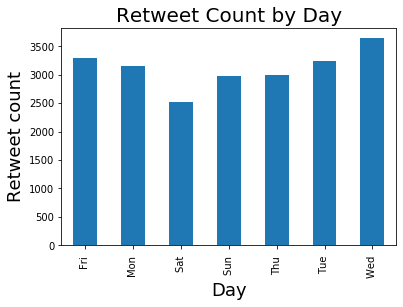

In [809]:
master_df.groupby('day')['retweet_count'].mean().plot(kind = 'bar')
plt.title('Retweet Count by Day', fontsize = 20)
plt.ylabel('Retweet count', fontsize = 18)
plt.xlabel('Day', fontsize = 18);
plt.savefig('highest_engagement_day_retweet.png')

#### Wednesday seems to be the day with the most retweet count

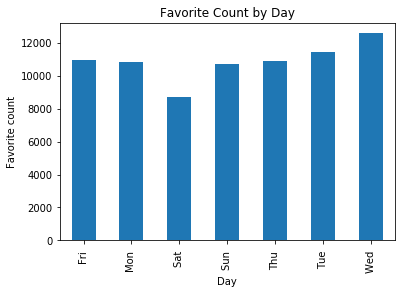

In [816]:
master_df.groupby('day')['favorite_count'].mean().plot(kind = 'bar')
plt.title('Favorite Count by Day')
plt.ylabel('Favorite count')
plt.xlabel('Day');
plt.savefig('highest_engagement_day_favorite.png')

#### Again Wednesday seems to be the day with the most favorite count, which makes it the day with the highest engagement.

### Checking for dog stage with the highest rating

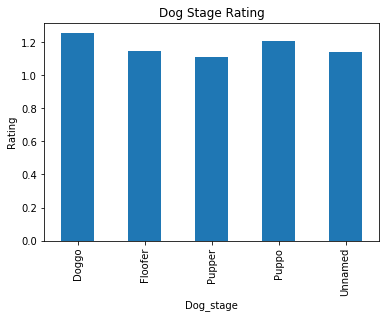

In [821]:
master_df.groupby('dog_stage')['rating'].mean().plot(kind='bar')
plt.title('Dog Stage Rating')
plt.xlabel('Dog_stage')
plt.ylabel('Rating');


#### Doggo has the highest rating

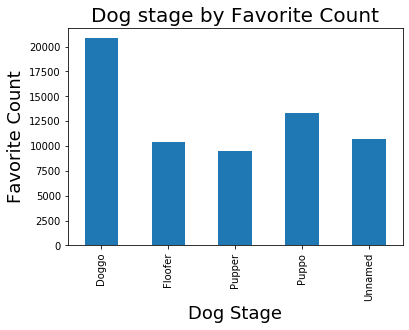

In [824]:
master_df.groupby('dog_stage')['favorite_count'].mean().plot(kind='bar')
plt.title('Dog stage by Favorite Count', fontsize=20)
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Favorite Count', fontsize=18);

#### Doggo again has the most favorite count

#### Checking for the most popular dog name

In [825]:
master_df.groupby('dog_stage')['tweet_id'].count()

dog_stage
Doggo       22
Floofer      4
Pupper      62
Puppo       12
Unnamed    655
Name: tweet_id, dtype: int64

#### Ploting a graph for the most popular dog name and excluding the unnamed column

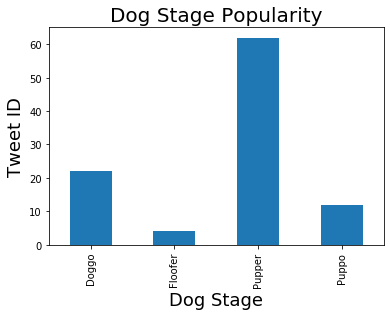

In [826]:
master_df.groupby('dog_stage')['tweet_id'].count()[:-1].plot(kind='bar')
plt.title('Dog Stage Popularity', fontsize=20)
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Tweet ID', fontsize=18);


#### The graph shows Pupper as the dog stage with the largest population